In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../datasets/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# checking for duplicate values
df.duplicated().sum()

1

In [5]:
# removing duplicate values from DataFrame
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(302, 14)

In [7]:
# counting target variable class samples
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

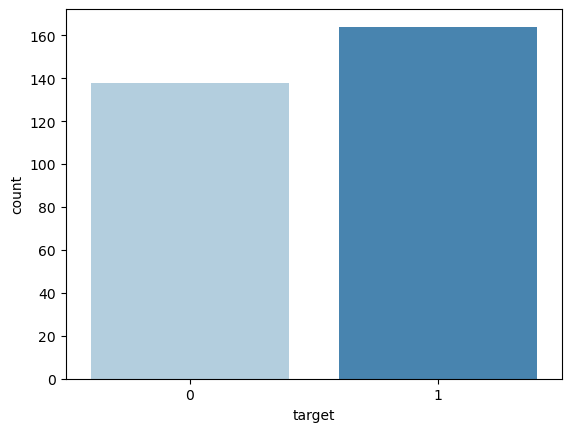

In [8]:
# target classes visualization
sns.countplot(x='target', data=df, palette='Blues')

In [9]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
# all values are converted to the same scale
scaled_data = scaler.transform(df)

In [11]:
# scaled data
scaled_data

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -0.71491124,
        -2.1479552 ,  0.91731315],
       [-1.92854796,  0.68265615,  1.005911  , ..., -0.71491124,
        -0.51399432,  0.91731315],
       [-1.48572607, -1.46486632,  0.0353515 , ..., -0.71491124,
        -0.51399432,  0.91731315],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ...,  1.27497996,
         1.11996657, -1.09014026],
       [ 0.28556146,  0.68265615, -0.93520799, ...,  0.28003436,
         1.11996657, -1.09014026],
       [ 0.28556146, -1.46486632,  0.0353515 , ...,  0.28003436,
        -0.51399432, -1.09014026]])

In [12]:
# shape of scaled data
scaled_data.shape

(302, 14)

In [13]:
# PCA for dimensionality reduction

# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=13)

In [14]:
# fitting the PCA instance
pca.fit(scaled_data)

PCA(n_components=13)

In [15]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_data)

In [16]:
# checking the shape for the scaled data and PCA respectively
scaled_data.shape, x_pca.shape

((302, 14), (302, 13))

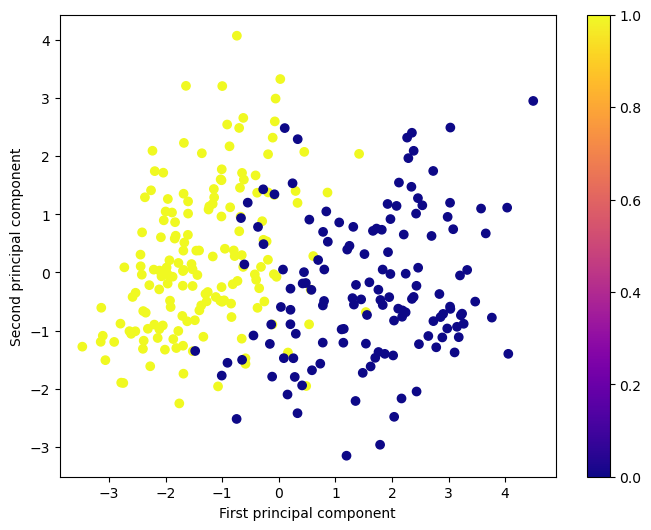

In [17]:
# plotting the first two dimensions
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df["target"], cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

In [18]:
# defining independent variables and target variable
X = x_pca
y = df["target"]

In [19]:
X.shape, y.shape

((302, 13), (302,))

In [20]:
X

array([[-0.07079966,  2.59759038,  0.27570859, ..., -0.54098575,
        -0.51627526,  0.36539579],
       [-0.83583938, -0.76575105, -0.74922388, ..., -0.26847519,
        -0.49500865,  0.124664  ],
       [-2.07314139, -0.06520256, -0.48933945, ...,  0.42193815,
        -0.09796923, -1.05821689],
       ...,
       [ 2.69885234,  0.62813738,  1.43320095, ..., -1.32052618,
        -1.007351  , -0.73286907],
       [ 2.16825652, -2.16553008, -0.26479862, ...,  0.33250521,
         0.1176169 ,  0.35667754],
       [-0.36766377,  0.78365116, -0.30137611, ..., -0.1120774 ,
         0.23636078,  1.51429686]])

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [22]:
# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
# svm classifier
svm_clf = SVC(kernel="linear")

In [24]:
import time
start = time.time()

#fitting the classifier
svm_clf.fit(X_train, y_train)

end = time.time()
print(end - start, "seconds")

0.005533933639526367 seconds


In [25]:
y_pred = svm_clf.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.967032967032967


/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


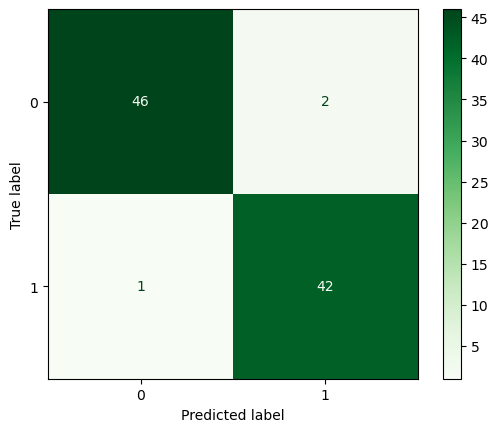

In [27]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greens))

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.95      0.98      0.97        43

    accuracy                           0.97        91
   macro avg       0.97      0.97      0.97        91
weighted avg       0.97      0.97      0.97        91



In [29]:
# finding the best number of components after oversampling with SMOTE
components = []
accuracies = []
for component in range(1,15):
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    X = x_pca
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    svm_clf = SVC(kernel="linear").fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Component:",component)
    components.append(component)
    accuracies.append(accuracy)
    print("Accuracy:",accuracy)
    print("********************")

Component: 1
Accuracy: 0.9016393442622951
********************
Component: 2
Accuracy: 0.9016393442622951
********************
Component: 3
Accuracy: 0.9344262295081968
********************
Component: 4
Accuracy: 0.9508196721311475
********************
Component: 5
Accuracy: 0.9508196721311475
********************
Component: 6
Accuracy: 0.9672131147540983
********************
Component: 7
Accuracy: 0.9672131147540983
********************
Component: 8
Accuracy: 0.9344262295081968
********************
Component: 9
Accuracy: 0.9344262295081968
********************
Component: 10
Accuracy: 0.9344262295081968
********************
Component: 11
Accuracy: 0.9508196721311475
********************
Component: 12
Accuracy: 0.9508196721311475
********************
Component: 13
Accuracy: 0.9672131147540983
********************
Component: 14
Accuracy: 1.0
********************


In [30]:
X.shape

(302, 14)

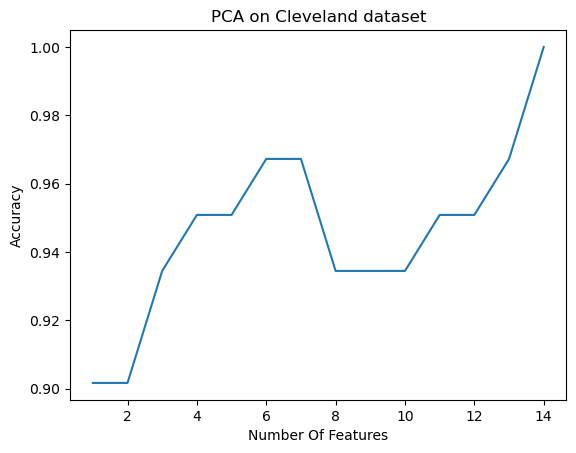

In [31]:
#We can see the best number of features
plt.title("PCA on Cleveland dataset")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(components, accuracies)
plt.show()

In [32]:
components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [33]:
accuracies

[0.9016393442622951,
 0.9016393442622951,
 0.9344262295081968,
 0.9508196721311475,
 0.9508196721311475,
 0.9672131147540983,
 0.9672131147540983,
 0.9344262295081968,
 0.9344262295081968,
 0.9344262295081968,
 0.9508196721311475,
 0.9508196721311475,
 0.9672131147540983,
 1.0]